### Normalized Cut
[link to example](https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_ncut.html#sphx-glr-auto-examples-segmentation-plot-ncut-py)

This example constructs a Region Adjacency Graph (RAG) and recursively performs a Normalized Cut on it.

In [1]:
import skimage
from matplotlib import pyplot as plt

c:\Users\AdamSz\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


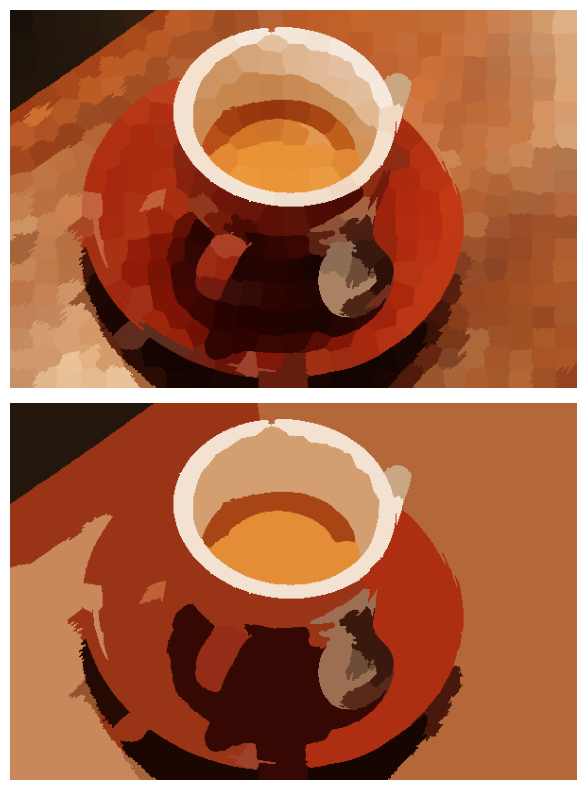

In [2]:
img = skimage.data.coffee()

labels_1 = skimage.segmentation.slic(img, compactness=30, n_segments=400, start_label=1)
out_1 = skimage.color.label2rgb(labels_1, img, kind='avg', bg_label=0)

g = skimage.future.graph.rag_mean_color(img, labels_1, mode='similarity')

labels_2 = skimage.future.graph.cut_normalized(labels_1, g)
out_2 = skimage.color.label2rgb(labels_2, img, kind='avg', bg_label=0)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(6,8))

ax[0].imshow(out_1)
ax[1].imshow(out_2)

for a in ax:
    a.axis('off')

plt.tight_layout()

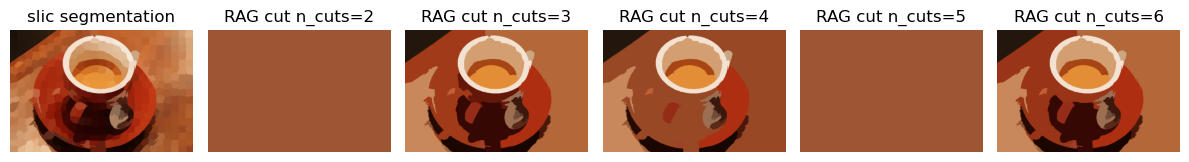

In [3]:
from skimage import data, segmentation, color
from skimage.future import graph
from matplotlib import pyplot as plt


img = data.coffee()

labels1 = segmentation.slic(img, compactness=30, n_segments=400,
                            start_label=1)
out1 = color.label2rgb(labels1, img, kind='avg', bg_label=0)

g = graph.rag_mean_color(img, labels1, mode='similarity')


N = 6
fig, ax = plt.subplots(ncols=N, sharex=True, sharey=True, figsize=(12, 6))

ax[0].set_title("slic segmentation")
ax[0].imshow(out1)

for n in range(1, N):
    n_cuts = n + 1
    labels2 = graph.cut_normalized(labels1, g, num_cuts=n_cuts)
    out2 = color.label2rgb(labels2, img, kind='avg', bg_label=0)
    ax[n].set_title(f"RAG cut n_cuts={n_cuts}")
    ax[n].imshow(out2)

for a in ax:
    a.axis('off')

plt.tight_layout()

Let's check how `num_cuts` influences the result:

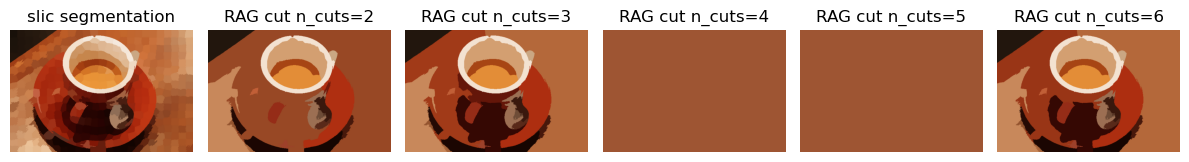

In [4]:
from skimage import data, segmentation, color
from skimage.future import graph
from matplotlib import pyplot as plt


img = data.coffee()

labels1 = segmentation.slic(img, compactness=30, n_segments=400,
                            start_label=1)
out1 = color.label2rgb(labels1, img, kind='avg', bg_label=0)

g = graph.rag_mean_color(img, labels1, mode='similarity')


N = 6
fig, ax = plt.subplots(ncols=N, sharex=True, sharey=True, figsize=(12, 6))

ax[0].set_title("slic segmentation")
ax[0].imshow(out1)

for n in range(1, N):
    n_cuts = n + 1
    labels2 = graph.cut_normalized(labels1, g, num_cuts=n_cuts)
    out2 = color.label2rgb(labels2, img, kind='avg', bg_label=0)
    ax[n].set_title(f"RAG cut n_cuts={n_cuts}")
    ax[n].imshow(out2)

for a in ax:
    a.axis('off')

plt.tight_layout()

Let's see how `thresh` influences the result:

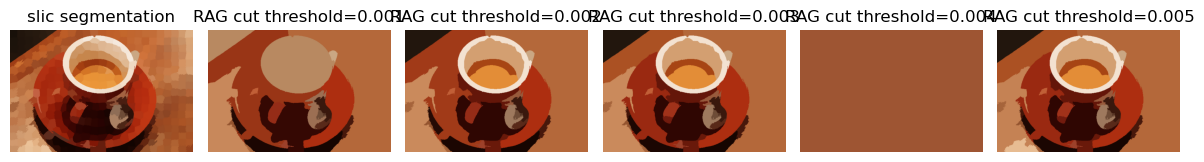

In [5]:
from skimage import data, segmentation, color
from skimage.future import graph
from matplotlib import pyplot as plt


img = data.coffee()

labels1 = segmentation.slic(img, compactness=30, n_segments=400,
                            start_label=1)
out1 = color.label2rgb(labels1, img, kind='avg', bg_label=0)

g = graph.rag_mean_color(img, labels1, mode='similarity')


N = 6
fig, ax = plt.subplots(ncols=N, sharex=True, sharey=True, figsize=(12, 6))

ax[0].set_title("slic segmentation")
ax[0].imshow(out1)

for n in range(1, N):
    thresh = n/1000
    labels2 = graph.cut_normalized(labels1, g, thresh=thresh)
    out2 = color.label2rgb(labels2, img, kind='avg', bg_label=0)
    ax[n].set_title(f"RAG cut threshold={thresh}")
    ax[n].imshow(out2)

for a in ax:
    a.axis('off')

plt.tight_layout()